<a href="https://colab.research.google.com/github/nghoangtu211100/LANDSAT8HN_LCLU/blob/main/myLULC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
rawdata = r'dataset.csv'
df = pd.read_csv(rawdata,skiprows=1,names=['x','y','label','B1','B2','B3','B4','B5','B6','B7','NDMI','NDVI'])
df.head()

,x,y,label,B1,B2,B3,B4,B5,B6,B7,NDMI,NDVI
28,584056.0,2290070.0,aquaculture,0.037652,0.059230,0.115502,0.089853,0.104587,0.031385,0.021370,0.538361,0.075777
70,597348.0,2297990.0,aquaculture,0.076952,0.082792,0.115502,0.093286,0.159341,0.100483,0.070639,0.226530,0.261472
58,584157.0,2290700.0,aquaculture,0.048071,0.071462,0.131822,0.109357,0.123207,0.047550,0.034176,0.443068,0.059553
63,591657.0,2313070.0,aquaculture,0.022139,0.027954,0.059276,0.042966,0.163669,0.081906,0.043042,0.332945,0.584136
60,590163.0,2317710.0,aquaculture,0.049571,0.060417,0.081465,0.070897,0.104992,0.071153,0.055459,0.192109,0.193844


In [15]:
# constants
X_labels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7','NDVI']
# X_labels = ['B5', 'B6', 'B7']
Y_labels = 'label'

In [16]:
df=df.sample(frac=1)
df[X_labels].agg(['min','max','median','mean','std']).style

,B1,B2,B3,B4,B5,B6,B7,NDVI
min,-0.003860,0.011661,0.010005,0.010090,0.017643,0.003565,0.005645,-0.485769
max,0.246842,0.286057,0.362826,0.410390,0.504556,0.994590,0.524092,0.930631
median,0.044344,0.052556,0.089434,0.080621,0.274538,0.202973,0.110979,0.509158
mean,0.050502,0.059645,0.095881,0.088808,0.260513,0.191645,0.121600,0.454399
std,0.027739,0.031004,0.036080,0.045042,0.097051,0.109107,0.077408,0.257363


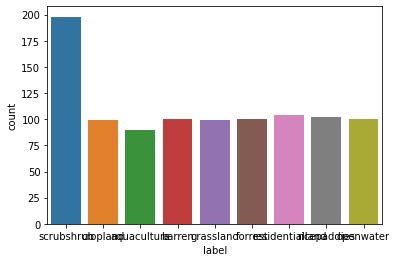

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


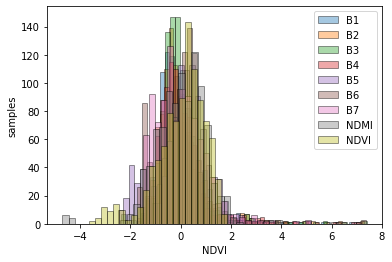

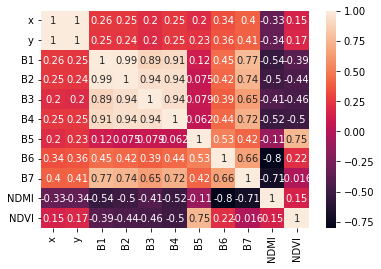

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#data preprocessing
def scale(dataset):
  scaler = StandardScaler().fit(dataset)
  return scaler.transform(dataset)
def normalize(dataset):
  scaler = MinMaxScaler()
  names = dataset.columns
  d = scaler.fit_transform(dataset)
  scaled_df = pd.DataFrame(d, columns=names)
  return scaled_df

#label distribution
sn.countplot(x='label', data=df)
plt.show()

#histogram
# bands = ['B1','B2','B3','B4','B5','B6','B7','NDMI','NDVI']
# for band in bands:
#         sn.distplot(df[band], hist=True, kde=False, 
#                 color = 'blue',
#                 hist_kws={'edgecolor':'black'})
#         # Add labels
#         plt.title('Histogram of ' + band)
#         plt.ylabel('samples')
#         plt.show()
bands = ['B1','B2','B3','B4','B5','B6','B7','NDMI','NDVI']
new_df = df

original_df = df
new_df[bands] = scale(new_df[bands])
df = new_df
for band in bands:
        sn.distplot(new_df[band], hist=True, kde=False, 
                    hist_kws={'edgecolor':'black'}, label=band)
# Add labels
plt.legend()
plt.ylabel('samples')
plt.show()

#correlation matix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(df[X_labels], df[Y_labels], test_size=test_size,stratify=df["label"], random_state=random_state)

In [20]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)

print("KNN with original dataset---------------")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Test report')
report = metrics.classification_report(y_test, y_pred)
print(report)


KNN with original dataset---------------
Train Accuracy: 0.7465321563682219
Test Accuracy: 0.6884422110552764
Test report
                 precision    recall  f1-score   support

    aquaculture       0.77      0.94      0.85        18
         barren       0.80      0.80      0.80        20
       cropland       0.48      0.60      0.53        20
        forrest       0.50      0.35      0.41        20
      grassland       0.50      0.55      0.52        20
      openwater       0.93      0.70      0.80        20
residentialland       0.83      0.71      0.77        21
    ricepaddies       0.73      0.80      0.76        20
     scrubshrub       0.71      0.72      0.72        40

       accuracy                           0.69       199
      macro avg       0.69      0.69      0.69       199
   weighted avg       0.70      0.69      0.69       199

